<a href="https://colab.research.google.com/github/diablaxus/Redes-neuronales/blob/main/RNMulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
# 2. Cargar y preprocesar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# 3. Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Capa de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Capa de aplanamiento
model.add(layers.Flatten())

# Capa densa completamente conectada con 64 neuronas
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase de CIFAR-10)
model.add(layers.Dense(10))


In [4]:
# 4. Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [5]:
# 5. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.3832 - accuracy: 0.5041 - val_loss: 1.1518 - val_accuracy: 0.5869
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0210 - accuracy: 0.6441 - val_loss: 1.0709 - val_accuracy: 0.6221
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8896 - accuracy: 0.6914 - val_loss: 0.9763 - val_accuracy: 0.6645
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8024 - accuracy: 0.7202 - val_loss: 0.9655 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7229 - accuracy: 0.7483 - val_loss: 0.9606 - val_accuracy: 0.6774
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6587 - accuracy: 0.7727 - val_loss: 1.0111 - val_accuracy: 0.6738
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5952 - accuracy: 0.7900 - val_loss: 1.0269 -

In [6]:
# 6. Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 - 1s - loss: 1.2323 - accuracy: 0.6637 - 1s/epoch - 5ms/step
Precisión en el conjunto de prueba: 0.6636999845504761


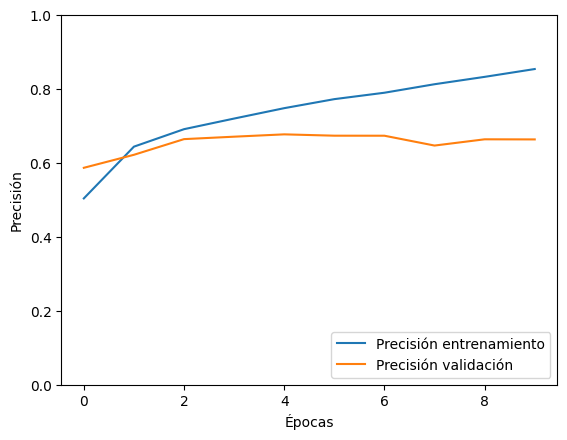

In [7]:
# 7. Graficar el historial de precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
